In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
import keras
import pandas as pd
from keras.layers import Dense, Activation, LSTM, Input

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
"""
inputs = Input(shape=(None, 2))
first_lstm = LSTM(30, return_state=True)
outputs, state_h1, state_c1 = first_lstm(inputs)
# We discard `encoder_outputs` and only keep the states.
#second_lstm = LSTM(30, return_state=True)
#outputs, state_h2, state_c2 = second_lstm(outputs)
dense_layer = Dense(1, activation='linear')
outputs = dense_layer(outputs)

model = Model(inputs, outputs)

"""

"""
model = Sequential()
model.add(LSTM(30, input_shape=(5000,2)))
model.add(Dense(40))
model.add(Dense(units=20, activation='sigmoid'))
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])
"""


"\nmodel = Sequential()\nmodel.add(LSTM(30, input_shape=(5000,2)))\nmodel.add(Dense(40))\nmodel.add(Dense(units=20, activation='sigmoid'))\nmodel.add(Dense(units=1, activation='linear'))\n\nmodel.compile(loss='mean_squared_error',\n              optimizer='Adam',\n              metrics=['accuracy'])\n"

In [3]:
model = Sequential()
model.add(LSTM(30, input_shape = (None, 2), return_sequences = True))
#model.add(LSTM(30))
model.add(Dense(40))
model.add(Dense(units=20, activation='sigmoid'))
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])


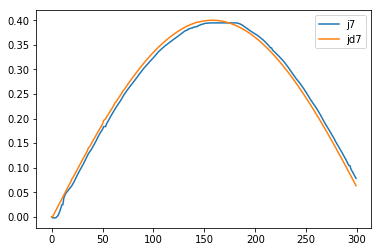

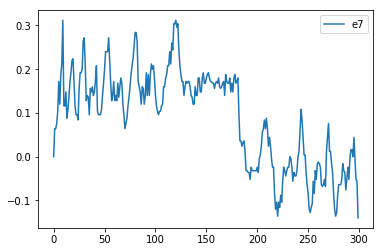

In [16]:
df = pd.read_csv('../vel_sin_motion_incrf/test_joint7/training_data_1.csv')
df_eval = pd.read_csv('../vel_sin_motion_incrf/test_joint7/validation_data_1.csv')
df_val = pd.read_csv('validation_data.csv')
fig1 = plt.figure()
df.j7[0:300].plot()
df.jd7[0:300].plot(); plt.legend(loc='best')
fig2 = plt.figure(); df.e7[0:300].plot(); plt.legend(loc='best')

In [10]:
model.fit(x_train, y_train, epochs =20)

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.4584 - acc: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 0.4380 - acc: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 0.4179 - acc: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.3983 - acc: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 0.3789 - acc: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 0.3598 - acc: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 0.3408 - acc: 0.0000e+00
Epoch 8/20
1/1 [==============================] - 3s 3s/step - loss: 0.3224 - acc: 0.0000e+00
Epoch 9/20
1/1 [==============================] - 3s 3s/step - loss: 0.3037 - acc: 0.0000e+00
Epoch 10/20
1/1 [==============================] - 3s 3s/step - loss: 0.2850 - acc: 0.0000e+00
Epoch 11/20
1/1 [==============================] - 3s 3s/st

In [7]:
sample_training1 = np.array(df.j7.values.tolist())
sample_training1 = sample_training1[1:]
sample_training1 = sample_training1.reshape(1,3500,1)
sample_training2 = np.array(df.e7.values.tolist())
sample_training2 = sample_training2[1:]
sample_training2 = sample_training2.reshape(1,3500,1)
sample_training3 = np.array(df.jd7.values.tolist())
sample_training3 = sample_training3[1:]
sample_training3 = sample_training3.reshape(1,3500,1)
x_train = np.concatenate([sample_training1, sample_training2], axis= 2)
y_train = np.array(df.jd7.values.tolist())[1:].reshape(1,3500,1)
#print sample.shape
print x_train.shape
print y_train.shape

(1, 3500, 2)
(1, 3500, 1)


In [8]:
sample_training11 = np.array(df_eval.j7.values.tolist())
sample_training11= sample_training11[1:]
sample_training11 = sample_training11.reshape(1,1500,1)
sample_training21 = np.array(df_eval.e7.values.tolist())
sample_training21 = sample_training21[1:]
sample_training21 = sample_training21.reshape(1,1500,1)
sample_training31 = np.array(df_eval.jd7.values.tolist())
sample_training31 = sample_training31[1:]
sample_training31 = sample_training31.reshape(1,1500,1)
x_val = np.concatenate([sample_training11, sample_training21], axis= 2)
#y_train = np.array(df_eval.jd7.values.tolist())[1:].reshape(1,1500,1)
#print sample.shape
print x_train.shape
print y_train.shape

(1, 3500, 2)
(1, 3500, 1)


In [11]:
pred = model.predict(x_val)
pred = pred.reshape(1500,1)
ze = np.zeros([1,1])
pred = np.concatenate((pred, ze), axis = 0)
pred = np.array(pred)
pred.shape
#df_eval['e7'].shape

(1501, 1)

<Figure size 432x288 with 0 Axes>

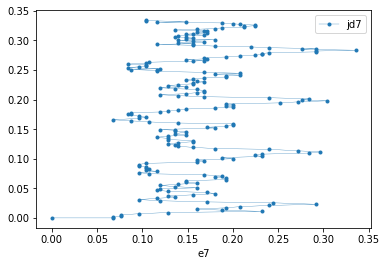

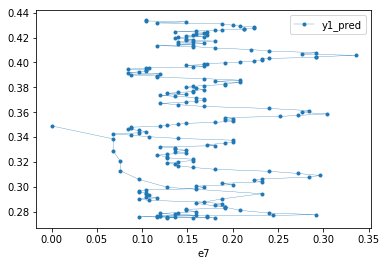

In [12]:

df_eval['y1_pred'] = pred

fig5 = plt.figure(); df_eval[0:200].plot(x = 'e7', y = 'jd7', marker='.',lw=0.3)
df_eval[0:200].plot(x = 'e7', y = 'y1_pred', marker='.',lw=0.3); plt.legend(loc='best')

In [13]:
from keras.layers import SimpleRNN

In [14]:
model1 = Sequential()
model1.add(SimpleRNN(30, input_shape = (None, 2), return_sequences = True))
model1.add(Dense(40))
model1.add(Dense(units=20, activation='sigmoid'))
model1.add(Dense(units=1, activation='linear'))

model1.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

In [15]:
model1.fit(x_train, y_train, epochs = 20)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6639 - acc: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 1s 645ms/step - loss: 0.6139 - acc: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 1s 651ms/step - loss: 0.5689 - acc: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 1s 678ms/step - loss: 0.5292 - acc: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 1s 712ms/step - loss: 0.4836 - acc: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 1s 668ms/step - loss: 0.4322 - acc: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 1s 812ms/step - loss: 0.3751 - acc: 0.0000e+00
Epoch 8/20
1/1 [==============================] - 1s 926ms/step - loss: 0.3152 - acc: 0.0000e+00
Epoch 9/20
1/1 [==============================] - 1s 1s/step - loss: 0.2551 - acc: 0.0000e+00
Epoch 10/20
1/1 [==============================] - 1s 911ms/step - loss: 0.2008 - acc: 0.0000e+00
Epoch 11/20
1/1 [==================

<Figure size 432x288 with 0 Axes>

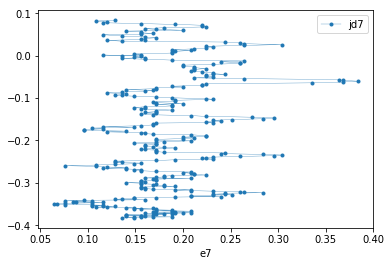

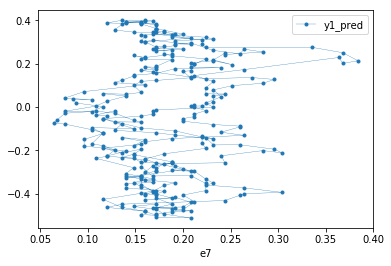

In [43]:
pred2 = model.predict(x_val)
pred2 = pred2.reshape(1500,1)
ze = np.zeros([1,1])
pred2 = np.concatenate((pred2, ze), axis = 0)
pred2 = np.array(pred2)
pred2.shape


df_eval['y1_pred'] = pred2

fig5 = plt.figure(); df_eval[1000:1300].plot(x = 'e7', y = 'jd7', marker='.',lw=0.3)
df_eval[1000:1300].plot(x = 'e7', y = 'y1_pred', marker='.',lw=0.3); plt.legend(loc='best')